# C. Exploratory Data Analysis

In [49]:
# import the required libraries
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
import datetime
%matplotlib inline

# Setting the location of the file to read from 
location1 = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\Other Data\UK\Stats19_Data_2005-2014\Accidents0514.csv'

# Read the accident files
accident_report = pd.read_csv(location1)

# Read the dictionary file providing key meaning to the values in accident files
location2 = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\Other Data\UK\Road-Accident-Safety-Data-Guide.xls'
Accident_days = pd.read_excel(location2, sheetname  ='Day of Week')

C:\Users\mesme\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
# Incorporate the Days of the week in the accident_report dataframe from Accident_days
Accident_days_count = pd.merge (Accident_days,accident_report, left_on =['code'], right_on=['Day_of_Week'],how='inner' )

In [51]:
# To find the total number of accidents in each days of the week
Accident_days_count = Accident_days_count.groupby(['label' ])['Accident_Index'].count().reset_index()
Accident_days_count = Accident_days_count.sort_values('Accident_Index', ascending = False).reset_index(drop=1)
Accident_days_count.head()

,label,Accident_Index
0,Friday,268985
1,Wednesday,247022
2,Thursday,246015
3,Tuesday,245275
4,Monday,233238


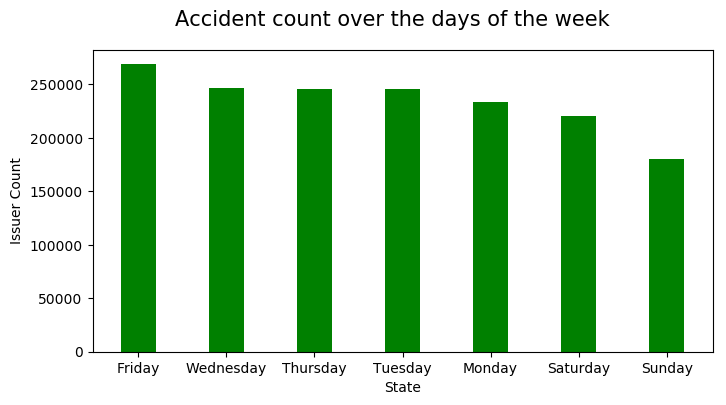

In [52]:
# Plot the data across each days
fig= plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Accident count over the days of the week', fontsize=15)
width = .4
plt.bar(Accident_days_count.label.index, Accident_days_count.Accident_Index,width, color="green",align='center')
LABELS = Accident_days_count.label
plt.xticks(Accident_days_count.label.index, LABELS)
plt.xlabel('State');
plt.ylabel('Issuer Count');
plt.show()

In [53]:
accident_report.Date = pd.to_datetime(accident_report.Date)

In [54]:
#accident_report.Date.dt.year
Accident_year = accident_report.groupby(accident_report.Date.dt.year)['Accident_Index'].count().reset_index()

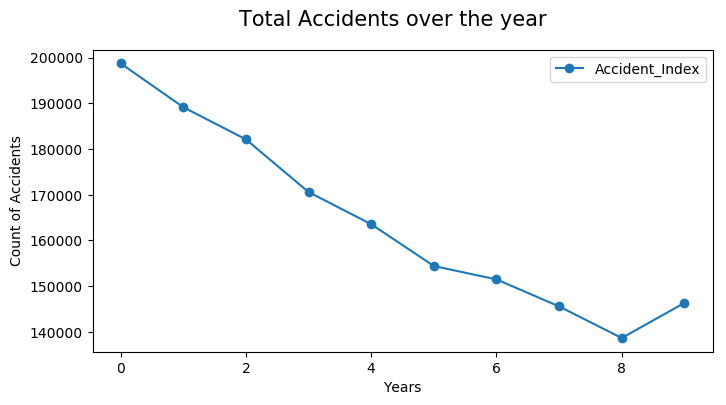

In [55]:
fig= plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Total Accidents over the year', fontsize=15, label ='Accident')
plt.plot(Accident_year.Date.index,Accident_year.Accident_Index, marker ='o')
plt.xlabel ("Years")
plt.ylabel ("Count of Accidents")
plt.legend(loc='upper right')

In [56]:
# fetch the number of accident over the accident category
categorised_accident = accident_report.groupby([accident_report.Date.dt.year,accident_report.Accident_Severity])['Accident_Index'].count().reset_index()
categorised_accident = categorised_accident.sort_values('Date')

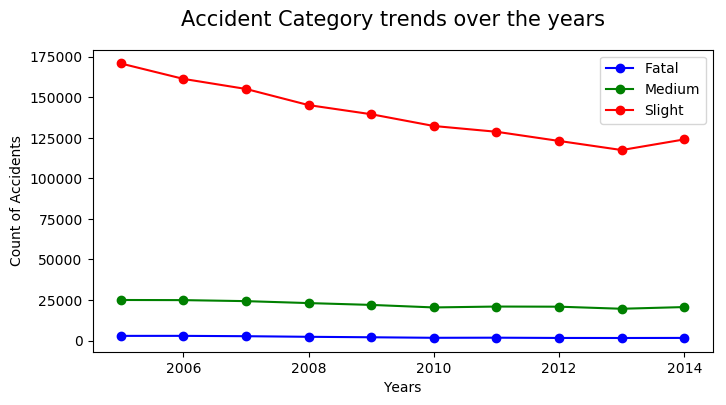

In [57]:
# Plotting the graph

fig= plt.figure(figsize=(8,4), dpi=100)

fig.suptitle('Accident Category trends over the years', fontsize=15)

plt.plot(categorised_accident[(categorised_accident['Accident_Severity'] == 1)].Date,
         categorised_accident[(categorised_accident['Accident_Severity'] == 1)].Accident_Index , color="blue", label = 'Fatal', marker ='o')

plt.plot(categorised_accident[(categorised_accident['Accident_Severity'] == 2)].Date,
         categorised_accident[(categorised_accident['Accident_Severity'] == 2)].Accident_Index , color="green", label = 'Medium', marker ='o')

plt.plot(categorised_accident[(categorised_accident['Accident_Severity'] == 3)].Date,
         categorised_accident[(categorised_accident['Accident_Severity'] == 3)].Accident_Index , color="red", label = 'Slight', marker ='o')

plt.legend(loc='upper right')
plt.xlabel ("Years")
plt.ylabel ("Count of Accidents")
plt.legend(loc='upper right')

In [58]:
# Get the number of accidents over districts
district_accident = accident_report.groupby(['Local_Authority_(District)'])['Accident_Index'].count().reset_index()
district_accident.rename(columns={'Local_Authority_(District)': 'District'}, inplace=True)
district_accident.head().reset_index(level=1, drop=True)

,District,Accident_Index
0,1,14964
1,2,8169
2,3,7299
3,4,8232
4,5,8821


In [59]:
# Get the values of the districts
location = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\Other Data\UK\Road-Accident-Safety-Data-Guide.xls'
variables_Report1 = pd.read_excel(location, sheetname  ='Local Authority (District)')
district_accident = pd.merge(variables_Report1,district_accident, left_on =['code'],right_on=['District'],how='inner' )
district_accident = district_accident.sort_values('Accident_Index', ascending = False)
district_accident.reset_index(level=1, drop=True) 
district_accident.drop(district_accident.columns[[0, 2]], axis=1, inplace=True)
district_accident.reset_index(level=1, drop=True)
district_accident.head()

,label,Accident_Index
155,Birmingham,31181
113,Leeds,21718
63,Manchester,15622
400,Glasgow City,15006
0,Westminster,14964


In [60]:
# Get the top 20 districts with highest accidents
district_accident_top20 = district_accident[:20].reset_index(level=1, drop=True)
district_accident_top20.head()

,label,Accident_Index
0,Birmingham,31181
1,Leeds,21718
2,Manchester,15622
3,Glasgow City,15006
4,Westminster,14964


C:\Users\mesme\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


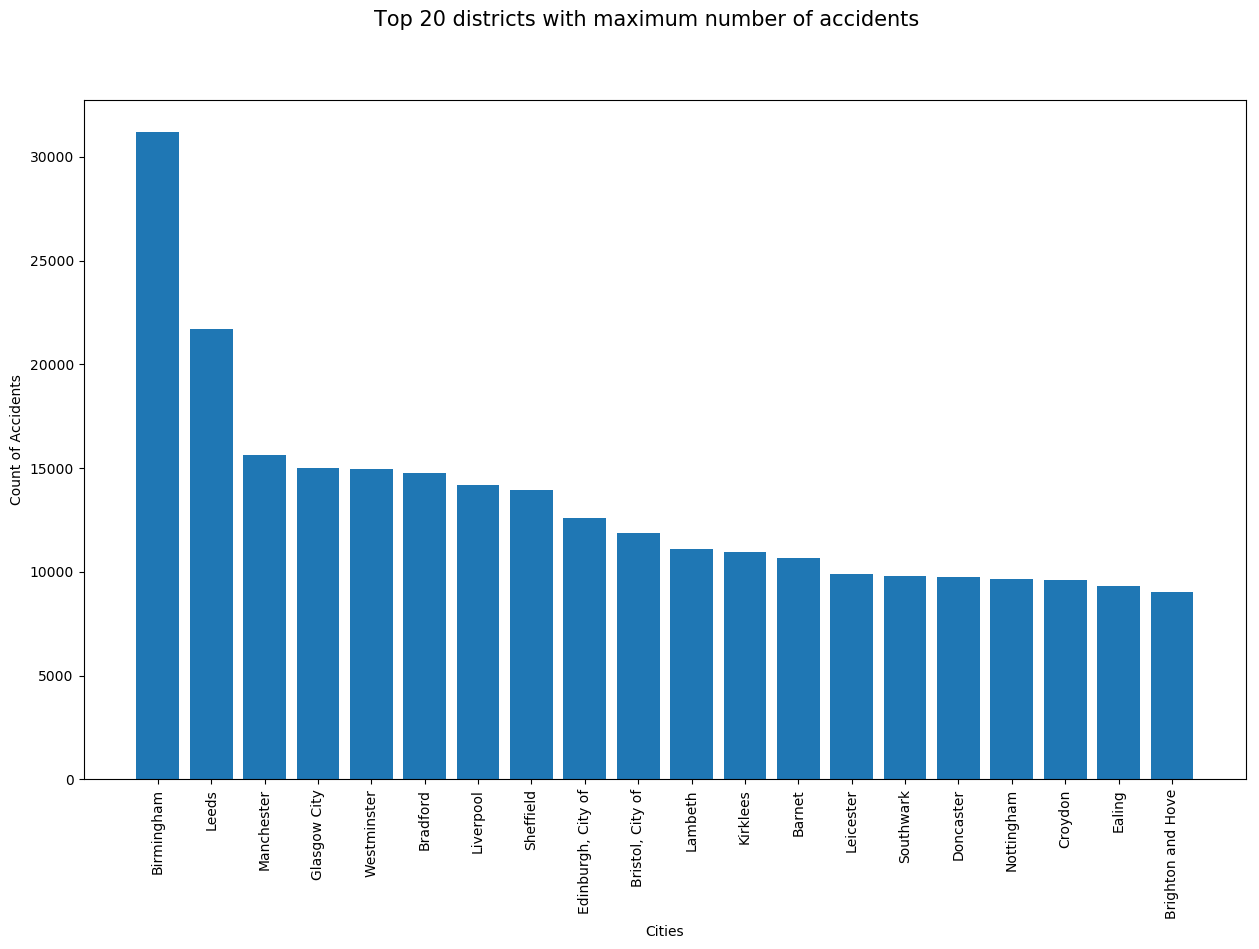

In [61]:
fig= plt.figure(figsize=(15, 9), dpi=100)
fig.suptitle('Top 20 districts with maximum number of accidents', fontsize=15)
plt.bar(district_accident_top20.label.index,district_accident_top20.Accident_Index)
level = district_accident_top20['label'].unique()
plt.xticks(district_accident_top20.label.index, level,rotation=90)
plt.xlabel ("Cities")
plt.ylabel ("Count of Accidents")
plt.legend(loc='upper right')
plt.show()

In [62]:
# Get the number of accidents by police force
police_accident = accident_report.groupby(['Police_Force'])['Accident_Index'].count().reset_index()
location = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\Other Data\UK\Road-Accident-Safety-Data-Guide.xls'
police_accident_var = pd.read_excel(location, sheetname  ='Police Force')
police_accident_var.head()

,code,label
0,1,Metropolitan Police
1,3,Cumbria
2,4,Lancashire
3,5,Merseyside
4,6,Greater Manchester


In [63]:
# Get the police department list from police_accident_var and merge it to police_accident
police_accident = pd.merge(police_accident_var,police_accident, left_on =['code'],right_on=['Police_Force'],how='inner' )
police_accident.drop(police_accident.columns[[0, 2]], axis=1, inplace=True)
police_accident = police_accident.sort_values('Accident_Index', ascending =False).reset_index(level=1, drop=True)

In [64]:
# fetch the list of top 20 police force
police_accident_top20 = police_accident[:20]
police_accident_top20.head()

,label,Accident_Index
0,Metropolitan Police,239812
1,West Midlands,68410
2,Greater Manchester,61759
3,Thames Valley,60919
4,West Yorkshire,60549


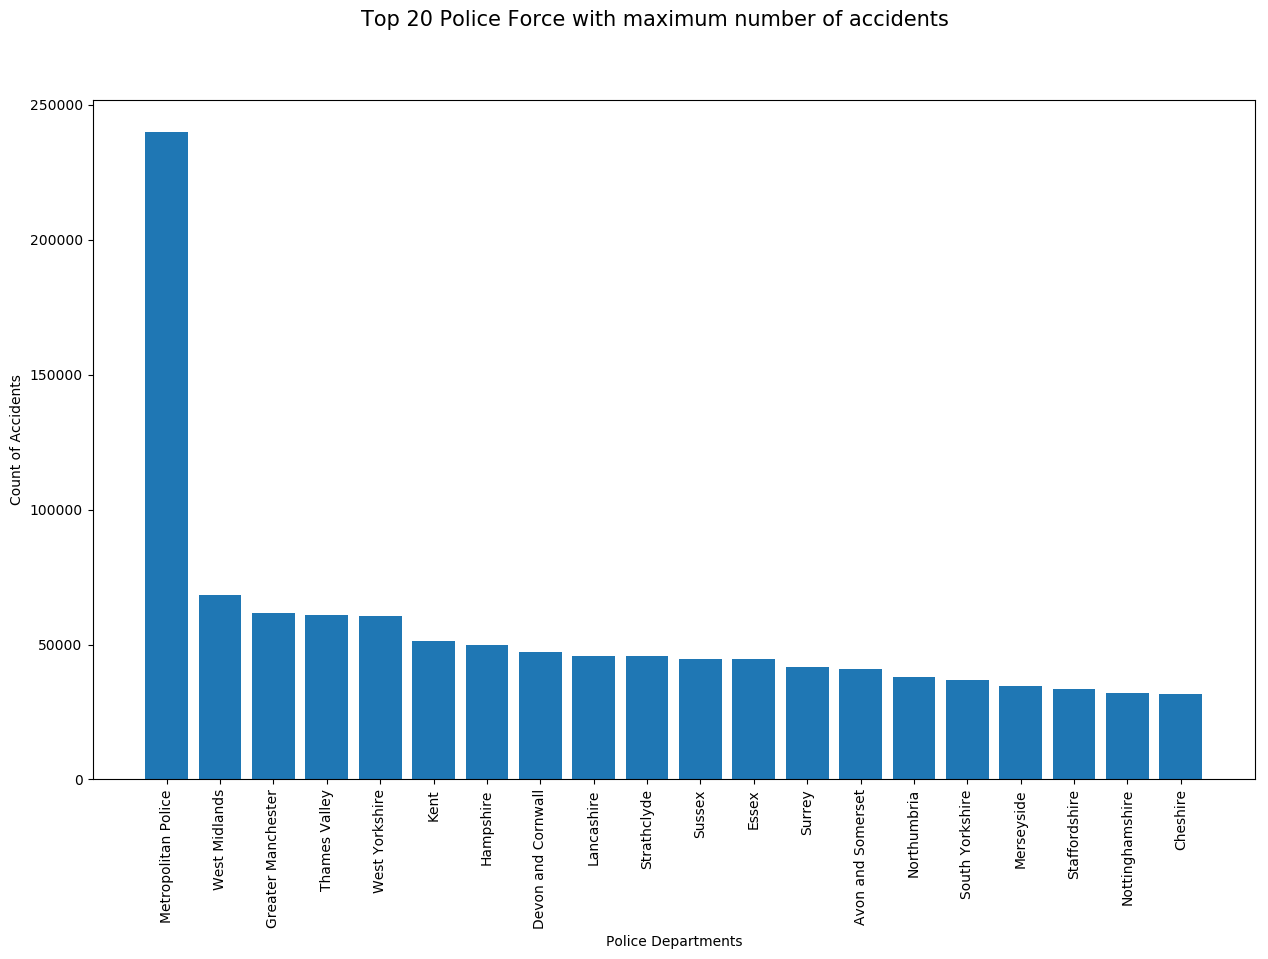

In [65]:
# Plot the graph of top 20 police force with high operations on accidents
fig= plt.figure(figsize=(15, 9), dpi=100)
fig.suptitle('Top 20 Police Force with maximum number of accidents', fontsize=15)
plt.bar(police_accident_top20.label.index,police_accident_top20.Accident_Index)
LABELS = police_accident_top20['label'].unique()
plt.xticks(police_accident_top20.label.index, LABELS,rotation=90)
plt.xlabel ("Police Departments")
plt.ylabel ("Count of Accidents")
plt.show()

In [66]:
# Analyse light conditions on roads, causing accident

light_accident= accident_report.groupby(['Local_Authority_(District)','Light_Conditions','Date'])['Accident_Index'].count().reset_index()
light_accident.rename(columns={'Local_Authority_(District)': 'District'}, inplace=True)
light_accident = pd.merge(variables_Report1,light_accident, left_on =['code'],right_on=['District'],how='inner' )

location = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\Other Data\UK\Road-Accident-Safety-Data-Guide.xls'
light_accident_var = pd.read_excel(location, sheetname  ='Light Conditions')


In [67]:
light_accident.head()

,code,label,District,Light_Conditions,Date,Accident_Index
0,1,Westminster,1,1,2005-01-01,1
1,1,Westminster,1,1,2005-01-02,3
2,1,Westminster,1,1,2005-01-03,1
3,1,Westminster,1,1,2005-01-04,5
4,1,Westminster,1,1,2005-01-05,1


In [68]:
light_accident_var.head()

,code,label
0,1,Daylight
1,4,Darkness - lights lit
2,5,Darkness - lights unlit
3,6,Darkness - no lighting
4,7,Darkness - lighting unknown


In [69]:
district_accident_top20.head()

,label,Accident_Index
0,Birmingham,31181
1,Leeds,21718
2,Manchester,15622
3,Glasgow City,15006
4,Westminster,14964


In [70]:
# Get the light conditions merged with the accident data
light_accident_fil = light_accident[light_accident['label'].isin(district_accident_top20.label)].groupby([light_accident.Date.dt.year,light_accident.Light_Conditions,light_accident.label])['Accident_Index'].count().reset_index()
light_accident_fil = pd.merge(light_accident_var,light_accident_fil, left_on =['code'],right_on=['Light_Conditions'],how='inner' )
light_accident_fil.rename(columns={'label_y': 'District_name'}, inplace=True)
light_accident_fil.drop(light_accident_fil.columns[[0,3]], axis=1, inplace=True)
light_accident_fil.rename(columns={'label_x': 'Light_Conditions'}, inplace=True)
light_accident_fil = light_accident_fil.sort_values(['District_name','Date']).reset_index(drop=1)
light_accident_fil.head()

,Light_Conditions,Date,District_name,Accident_Index
0,Daylight,2005,Barnet,314
1,Darkness - lights lit,2005,Barnet,215
2,Darkness - lights unlit,2005,Barnet,2
3,Darkness - no lighting,2005,Barnet,1
4,Darkness - lighting unknown,2005,Barnet,3


In [71]:
#Pivot the values of districts with the lighting conditions
light_accident_fil_box1 =light_accident_fil[(light_accident_fil['Light_Conditions'] == 'Darkness - lights unlit')].pivot(index=None, columns='District_name', values='Accident_Index')
light_accident_fil_box2 =light_accident_fil[(light_accident_fil['Light_Conditions'] == 'Darkness - no lighting')].pivot(index=None, columns='District_name', values='Accident_Index')

In [72]:
#reset the index
pivot_light_accident_fil_box1 = light_accident_fil_box1.reset_index(drop=1)
pivot_light_accident_fil_box2 = light_accident_fil_box2.reset_index(drop=1)

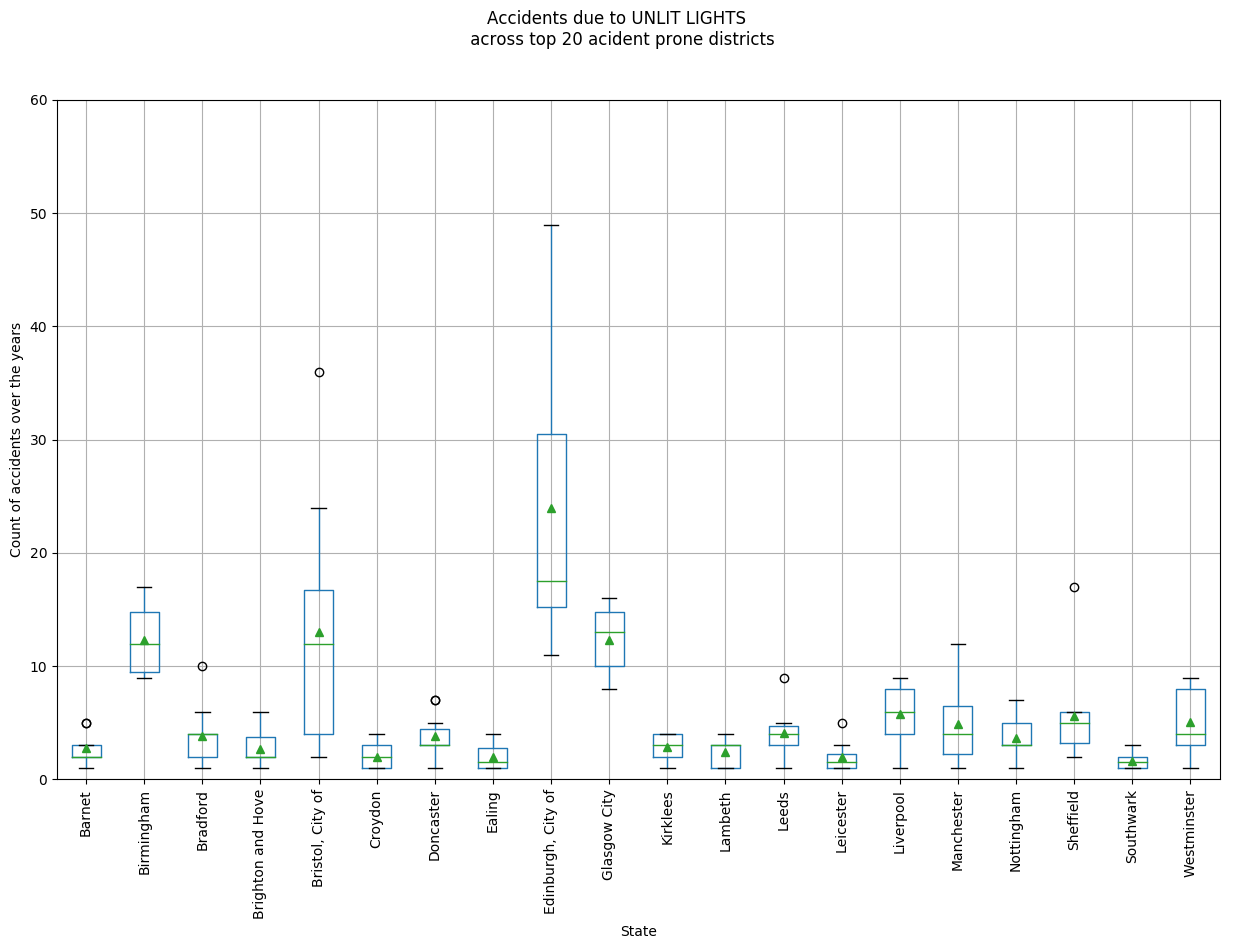

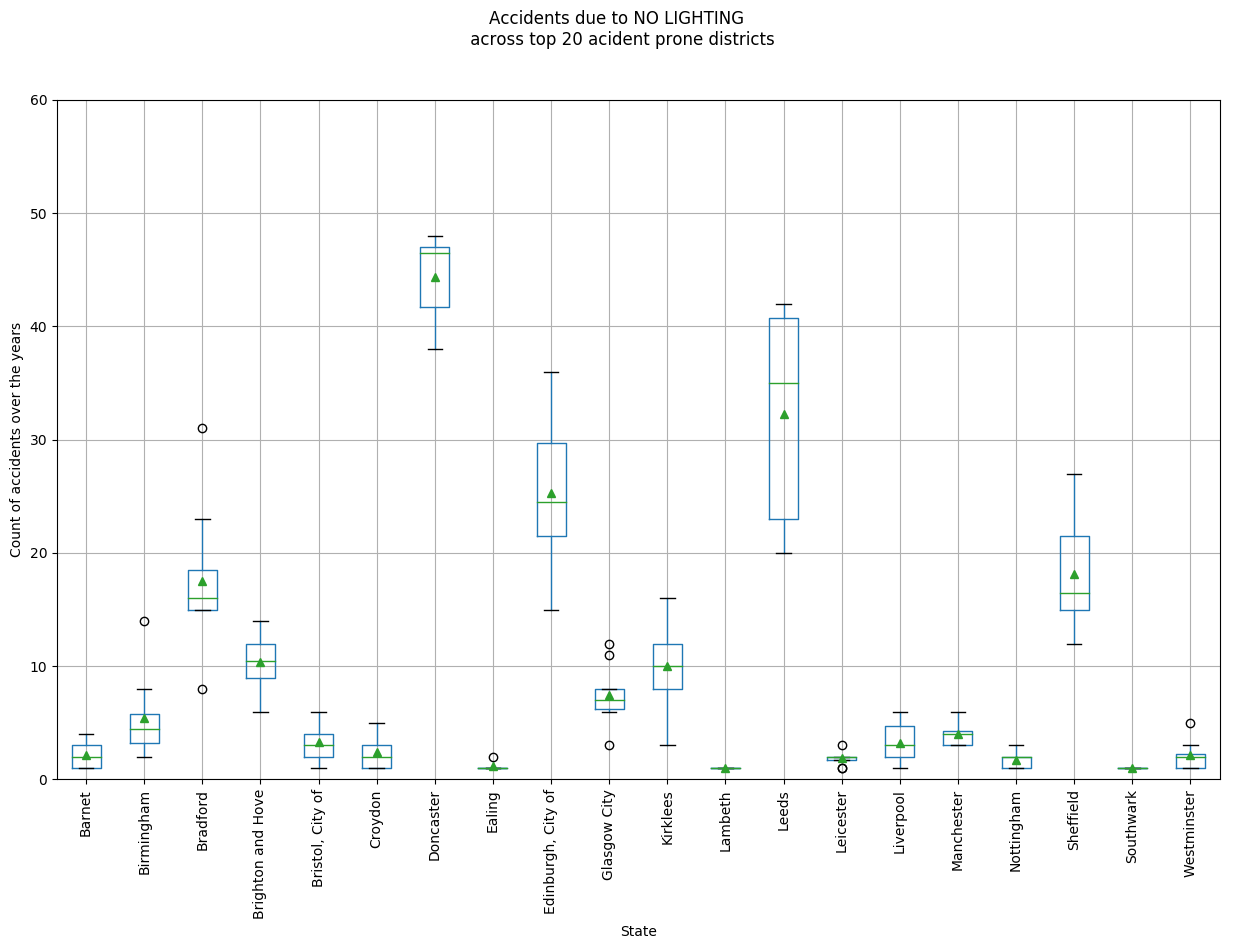

In [73]:
#PLot the above pivot data for UNLIT LIGHTS conditions
fig = plt.figure(figsize=(15, 9), dpi=100)
fig.suptitle('Accidents due to UNLIT LIGHTS \n across top 20 acident prone districts')
pivot_light_accident_fil_box1.boxplot( showfliers = True, return_type='axes', showmeans=True)
plt.xticks(rotation=90)
plt.ylim(0,60)
plt.xlabel('State');
plt.ylabel('Count of accidents over the years');

#PLot the above pivot data for NO LIGHTING conditions
fig = plt.figure(figsize=(15, 9), dpi=100)
fig.suptitle('Accidents due to NO LIGHTING \n across top 20 acident prone districts')
pivot_light_accident_fil_box2.boxplot( showfliers = True, return_type='axes', showmeans=True)
plt.xticks(rotation=90)
plt.ylim(0,60)
plt.xlabel('State');
plt.ylabel('Count of accidents over the years');

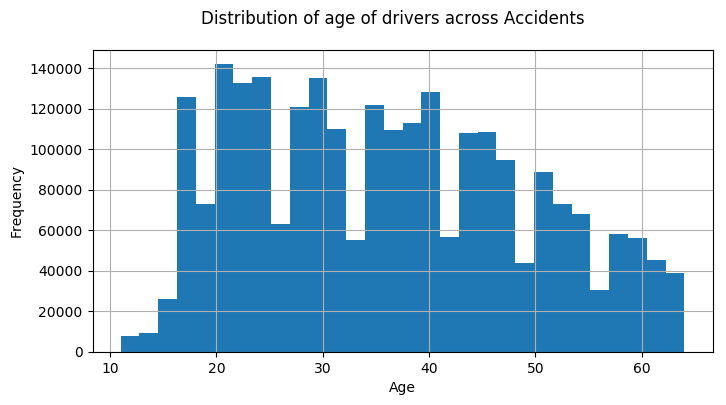

In [74]:
#Get the number of accidents over various age of the drivers

location = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\Other Data\UK\Stats19_Data_2005-2014\Vehicles0514.csv'
Vehicles_report = pd.read_csv(location)
Vehicles_report.head()

fig = plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Distribution of age of drivers across Accidents')

# Clean the age values of the driver and observe the distribution
Vehicles_report[(Vehicles_report.Age_of_Driver >10) & (Vehicles_report.Age_of_Driver < 65) ].Age_of_Driver.hist(bins =30)

plt.ylabel('Frequency');
plt.xlabel('Age');